In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import datetime
from haversine import haversine, Unit
from geopy import distance
from geopy.distance import lonlat, distance

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Analyse Exploratoire 
##### Analyse de forme:

- **Variable Target:** Client ID unique
- **Fichiers - Ligne - Colonnes:** 7 - 112649 - ?
- **Types de Variables:** 
- **Valeurs manquantes:** Peu de Nan
- **Valeurs aberrantes:**
- **Lignes redondantes:**

##### Analyse de fond:

- **Visualisation Target:** 
- **Signification des variables:** 
- **Relation variables/target:**
- **Relation variable/variable:**

### Analyse Exploratoire

#### Clients (Verif client Id VS Client id unique)

In [2]:
df_customer = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_customers_dataset.csv")
df_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


D:\Users\Damien\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


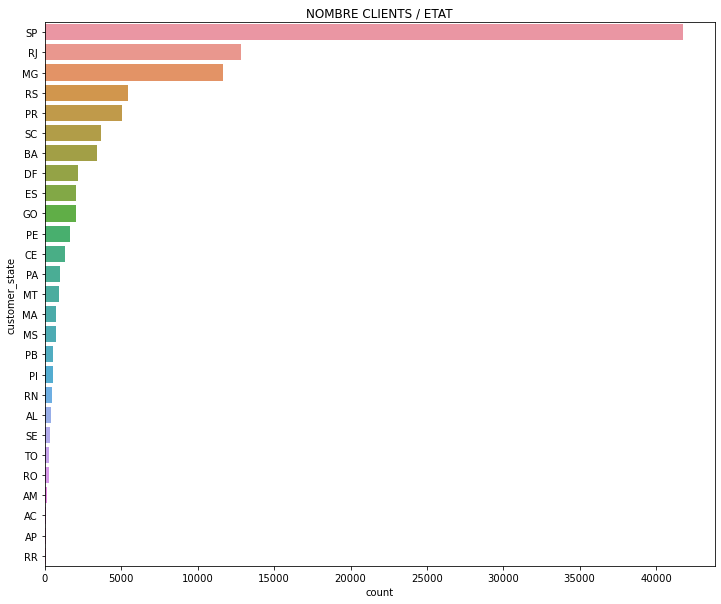

In [3]:
plt.figure(figsize=(12, 10))
sns.countplot(y="customer_state", data=df_customer,
              order=df_customer["customer_state"].value_counts().index)
plt.title("NOMBRE CLIENTS / ETAT")
plt.show()

SP : Sao Paolo, MG : Minas Gerais, RJ : Rio de Janeiro, RS : Rio Grande do Sul, PR : Paranà, SC : Santa Catarina, BA : Bahia, ES : Espírito Santo, GO : Goias, MT : Mato Grosso, PE : Pernambuco, PA : Parà, DF : Distrito Federal, CE : Cearà, MS : Mato Grosso do Sul, MA : Maranhão, AL : Alagoas, PB : Paraíba, PI : Piauí, SE : Sergipe, RN : Rio Grande do Norte, RO : Rondônia, TO : Tocantins, AC : Acre, AM : Amazonas, AP : Amapá, RR : Roraima.

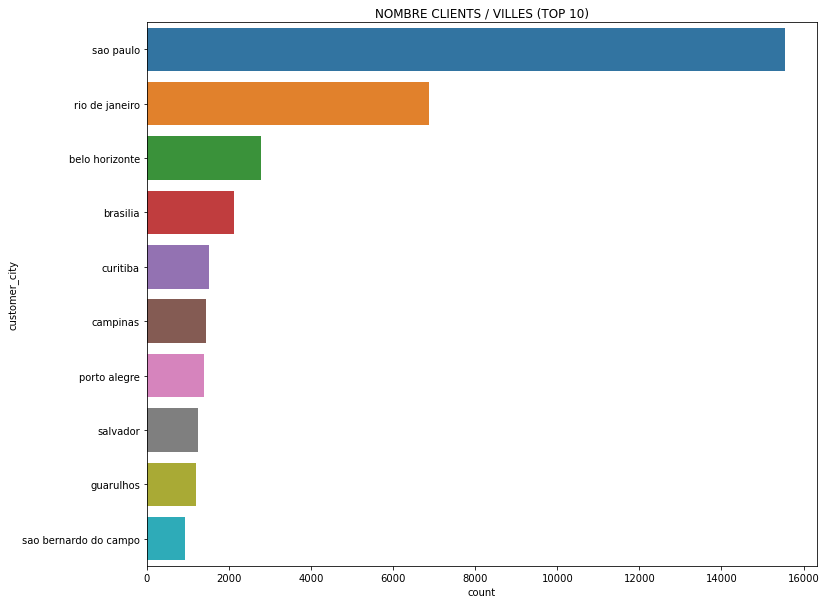

In [4]:
plt.figure(figsize=(12, 10))
sns.countplot(y="customer_city", data=df_customer,
              order=df_customer["customer_city"].value_counts().index[:10])
plt.title("NOMBRE CLIENTS / VILLES (TOP 10)")
plt.show()

Sao Paulo: 12M, Rio: 7M, belo horizonte: 3M, brasilia: 4M, curitiba

In [5]:
# Création de groupes
crea_groupes = {"sao paulo": "5",
                "rio de janeiro": "5",
                "salvador da bahia": "5",
                "brasilia": "4",
                "fortaleza": "4",
                "belo horizonte": "4",
                "curitiba": "4",
                "manaus": "4",
                "recife": "4",
                "porto alegre": "3",
                "belem": "3",
                "goiania": "3",
                "guarulhos": "3",
                "campinas": "3",
                "sao Goncalo": "3",
                "sao Luis": "3",
                "maceio": "2",
                "duque de caxias": "2",
                "nova iguacu": "2",
                "sao bernardo do campo": "2",
                "teresina": "2",
                "natal": "2",
                "campo grande": "2",
                "osasco": "2",
                "joao pessoa": "2",
                "santo andre": "2",
                "jaboatao dos guararapes": "2",
                "contagem": "2",
                "uberlandia": "2",
                "sao jose dos campos": "1",
                "feira de santana": "1",
                "sorocaba": "1",
                "ribeirao preto": "1",
                "cuiaba": "1",
                "aracaju": "1",
                "juiz de fora": "1",
                "londrina": "1",
                "joinville": "1",
                "ananindeua": "1",
                "belford roxo": "1",
                "aparecida de goiania": "1",
                "niteroi": "1",
                "sao joao de meriti": "1",
                "campos dos goytacazes": "1",
                "santos": "1",
                "betim": "1",
                "sao jose do rio preto": "1",
                "maua": "1",
                "caxias do sul": "1",
                "vila velha": "1",
                "florianopolis": "1",
                "olinda": "1",
                "diadema": "1",
                "serra": "1",
                "carapicuiba": "1",
                "porto velho": "1",
                "campina grande": "1",
                "mogi das cruzes": "1",
                "piracicaba": "1",
                "cariacica": "1",
                "montes claros": "1",
                "bauru": "1",
                "macapa": "1",
                "jundiai": "1",
                "pelotas": "1",
                "itaquaquecetuba": "1",
                "ribeirao das neves": "1",
                "canoas": "1",
                "maringa": "1",
                "anapolis": "1",
                "sao vicente": "1",
                "franca": "1",
                "caucaia": "1",
                "vitoria": "1",
                "foz do iguacu": "1",
                "vitoria da conquista": "1",
                "paulista": "1",
                "petropolis": "1",
                "ponta grossa": "1"}


for key, value in crea_groupes.items():
    df_customer['customer_city'].loc[df_customer["customer_city"].str.contains(
        key, case=False, regex=False)] = value

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
df_customer['customer_city'] = pd.to_numeric(
    df_customer['customer_city'], errors='coerce')

In [7]:
df_customer['customer_city'] = df_customer['customer_city'].fillna(0)

In [8]:
df_customer_group = df_customer.groupby('customer_unique_id').agg('count')
df_customer_group

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,1,1
0000f46a3911fa3c0805444483337064,1,1,1,1
0000f6ccb0745a6a4b88665a16c9f078,1,1,1,1
0004aac84e0df4da2b147fca70cf8255,1,1,1,1
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,1,1,1
fffea47cd6d3cc0a88bd621562a9d061,1,1,1,1
ffff371b4d645b6ecea244b27531430a,1,1,1,1


In [9]:
df_customer_group['customer_id'].value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: customer_id, dtype: int64

In [10]:
df_customer.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
851a2dae33c4baff4033cbe44b5bb2cc     1
cd5a39a03489db425bf3715d0290176e     1
cbbdfa950c932203f98dff23007d0182     1
9a1ab866d950aa4cb024750c183b5d15     1
c82692c3a692738d655e0f1b0041d907     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [11]:
df_customer_copy = df_customer.copy()
df_customer_copy['customer_unique_id'].astype('string')

0        861eff4711a542e4b93843c6dd7febb0
1        290c77bc529b7ac935b93aa66c333dc3
2        060e732b5b29e8181a18229c7b0b2b5e
3        259dac757896d24d7702b9acbbff3f3c
4        345ecd01c38d18a9036ed96c73b8d066
                       ...               
99436    1a29b476fee25c95fbafc67c5ac95cf8
99437    d52a67c98be1cf6a5c84435bd38d095d
99438    e9f50caf99f032f0bf3c55141f019d99
99439    73c2643a0a458b49f58cea58833b192e
99440    84732c5050c01db9b23e19ba39899398
Name: customer_unique_id, Length: 99441, dtype: string

In [12]:
print("Nombre de clients unique:", df_customer['customer_unique_id'].nunique())

Nombre de clients unique: 96096


In [13]:
print("Nombre de clients:", df_customer['customer_id'].nunique())

Nombre de clients: 99441


#### Geoloc

In [14]:
df_geoloc = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_geolocation_dataset.csv")
df_geoloc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


#### Prix produits

In [15]:
df_prod_order = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_order_items_dataset.csv")
df_prod_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [16]:
df_priceview = df_prod_order[df_prod_order['price'] < 1000]
df_priceview

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [17]:
df_priceview.describe()

,order_item_id,price,freight_value
count,111804.000000,111804.000000,111804.000000
mean,1.198821,109.553590,19.686339
std,0.706575,119.986605,14.786667
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.040000
50%,1.000000,74.495000,16.210000
75%,1.000000,130.000000,21.020000
max,21.000000,999.990000,409.680000


<AxesSubplot:xlabel='price'>

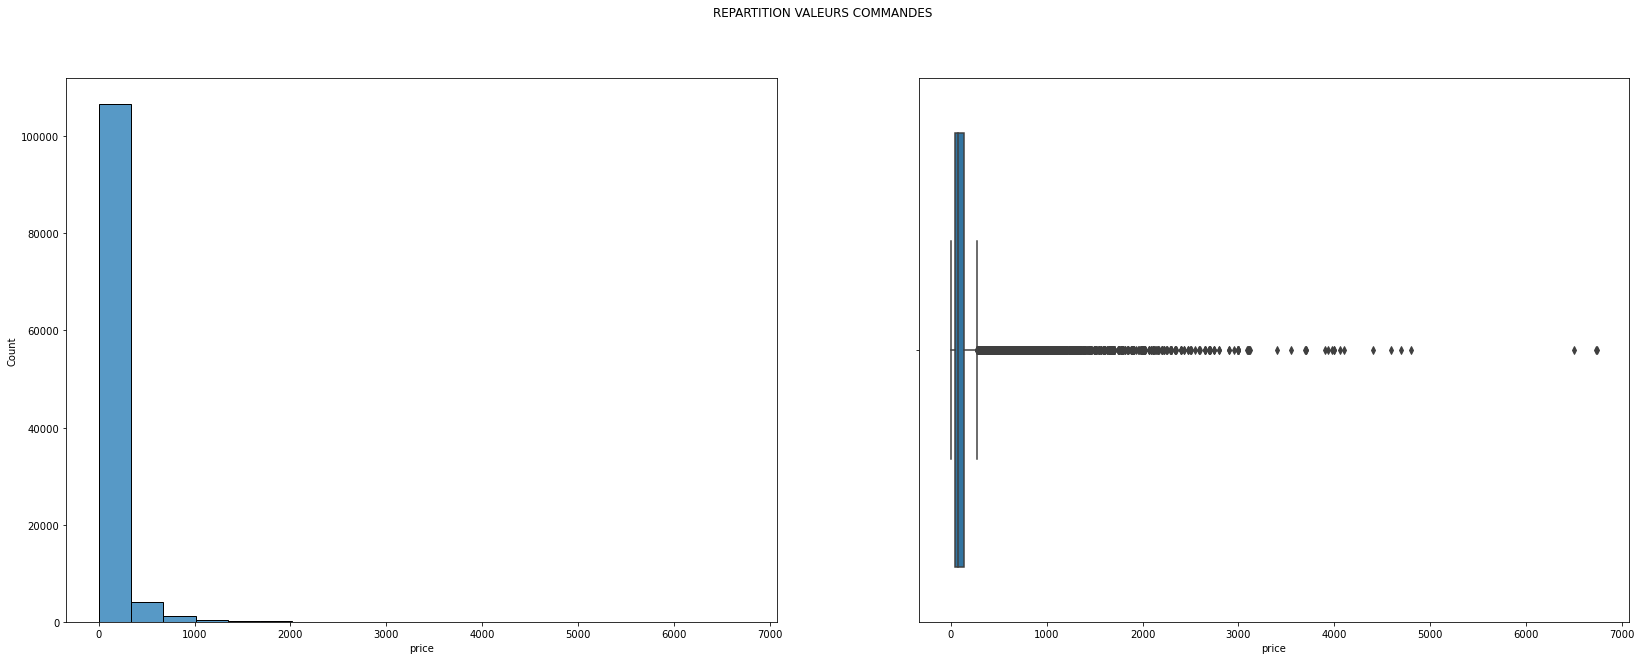

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('REPARTITION VALEURS COMMANDES')

# histplot
sns.histplot(ax=axes[0], data=df_prod_order, x=df_prod_order['price'], bins=20)

# Boxplot
sns.boxplot(ax=axes[1], data=df_prod_order, x=df_prod_order['price'])

<AxesSubplot:xlabel='price'>

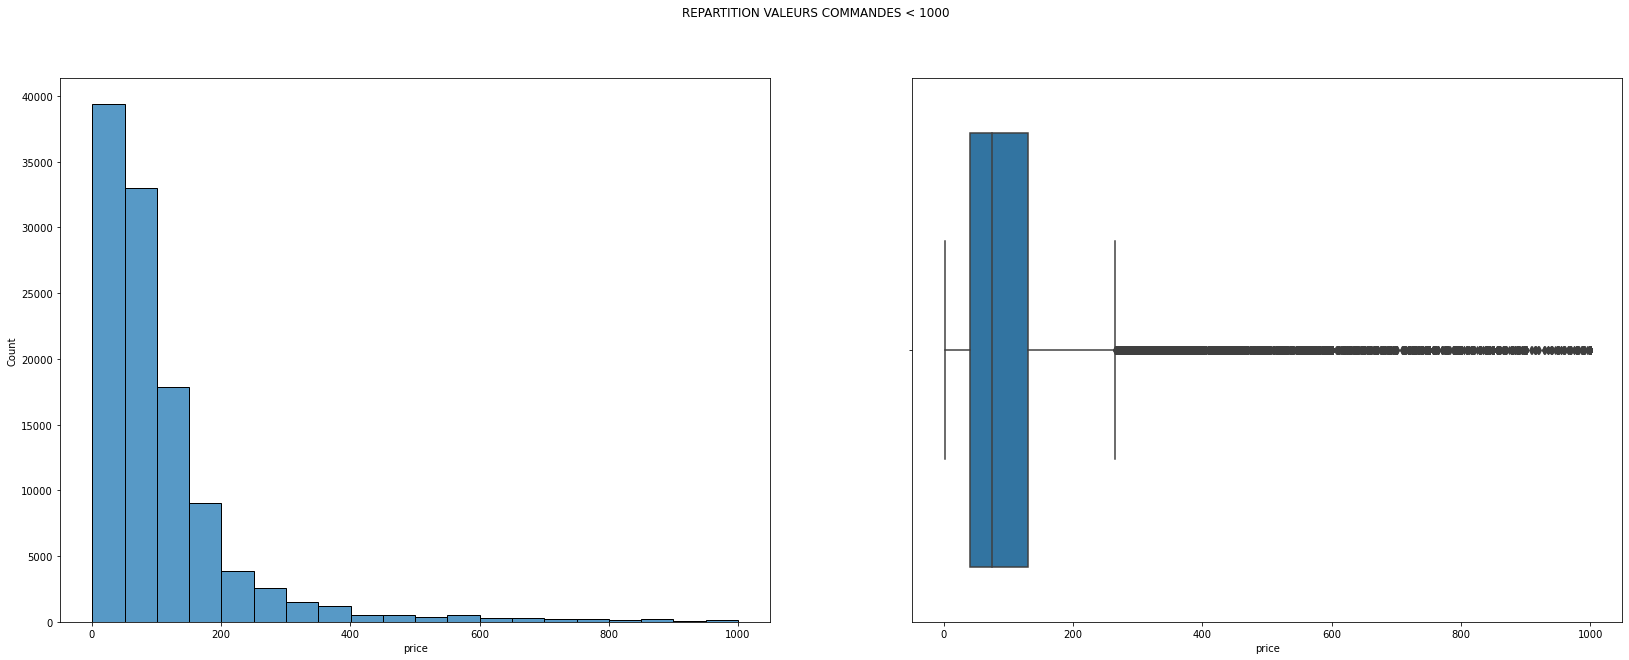

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('REPARTITION VALEURS COMMANDES < 1000')

# histplot
sns.histplot(ax=axes[0], data=df_priceview, x=df_priceview['price'], bins=20)

# Boxplot
sns.boxplot(ax=axes[1], data=df_priceview, x=df_priceview['price'])

<AxesSubplot:xlabel='freight_value'>

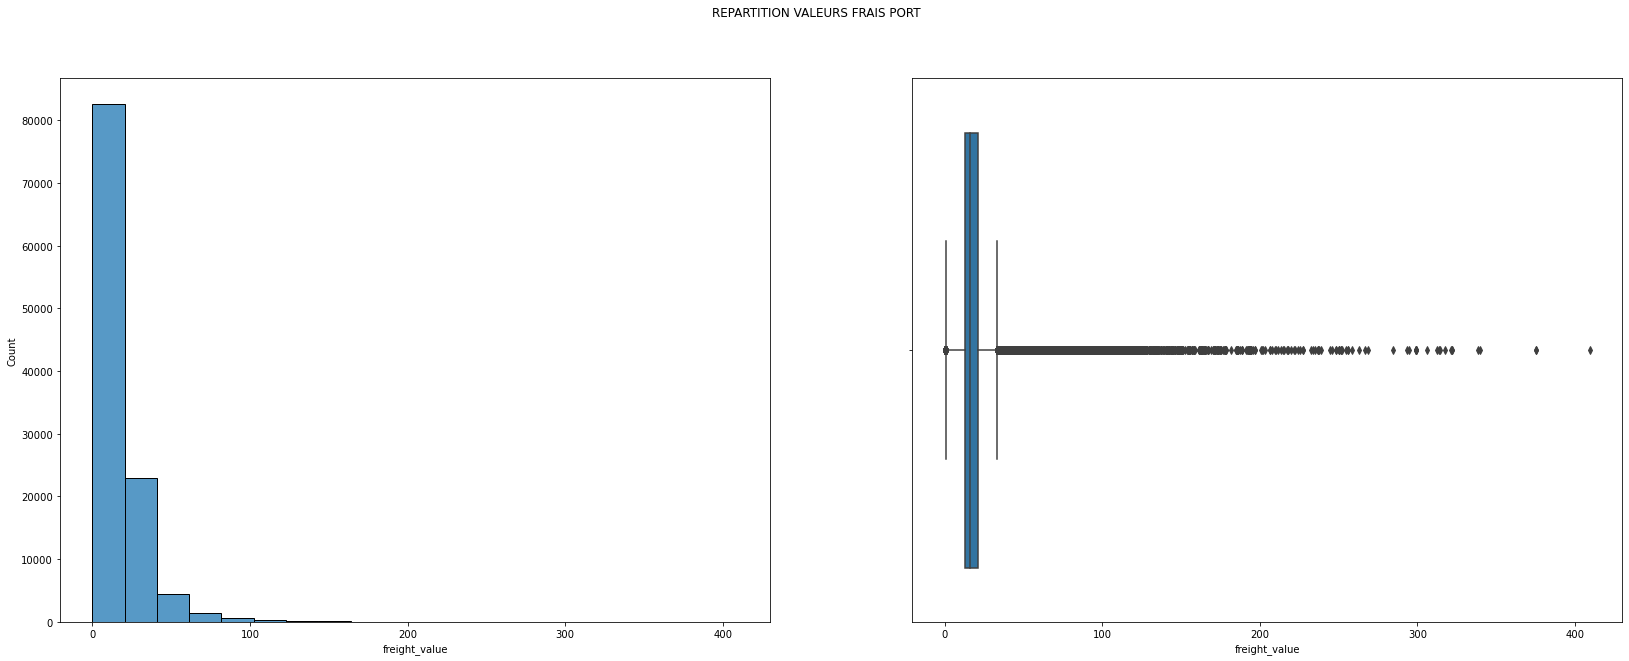

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('REPARTITION VALEURS FRAIS PORT')

# histplot
sns.histplot(ax=axes[0], data=df_prod_order,
             x=df_prod_order['freight_value'], bins=20)

# Boxplot
sns.boxplot(ax=axes[1], data=df_prod_order, x=df_prod_order['freight_value'])

In [21]:
df_priceview['price'].describe()

count    111804.000000
mean        109.553590
std         119.986605
min           0.850000
25%          39.900000
50%          74.495000
75%         130.000000
max         999.990000
Name: price, dtype: float64

In [22]:
df_prod_order.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
print("Nombre de produits unique:", df_prod_order['product_id'].nunique())

Nombre de produits unique: 32951


In [24]:
df_prod_order.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
e96867993d08fadbc6f828871885f897      1
b463e740932577be6bedc720f216e79c      1
589e33ce1e8aac8c6600a786fc0a3fa0      1
29d405763934f77ce87d3cdad21b7805      1
b7a58cab4a8f4016e27298891cbf47e6      1
Name: product_id, Length: 32951, dtype: int64

#### Type paiement

In [25]:
df_paym_order = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_order_payments_dataset.csv")
df_paym_order

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


<function matplotlib.pyplot.show(close=None, block=None)>

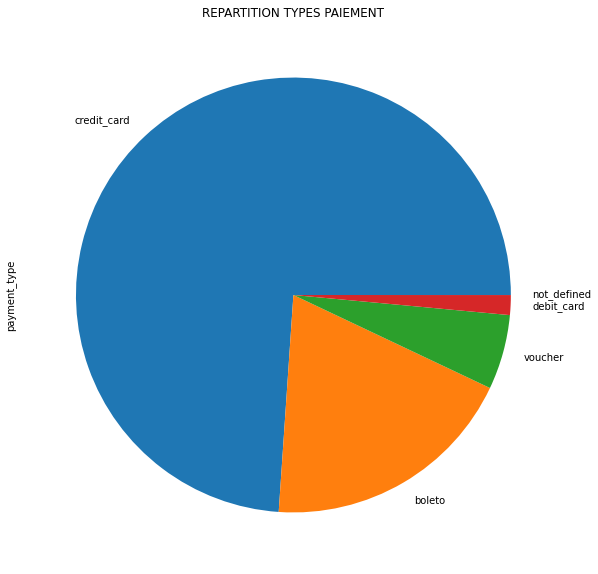

In [26]:
plt.figure(figsize=(10, 10))
df_paym_order.payment_type.value_counts().plot.pie()
plt.title("REPARTITION TYPES PAIEMENT")
plt.show

In [27]:
df_paym_order['order_id'].isin(df_prod_order['order_id']).value_counts()

True     103056
False       830
Name: order_id, dtype: int64

In [28]:
df_order = df_prod_order.merge(
    df_paym_order[['order_id', 'payment_type', 'payment_value']], on='order_id')
df_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,credit_card,218.04
...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,boleto,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,boleto,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,credit_card,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,credit_card,64.71


#### Reviews

In [29]:
df_reviews = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_order_reviews_dataset.csv")
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


<function matplotlib.pyplot.show(close=None, block=None)>

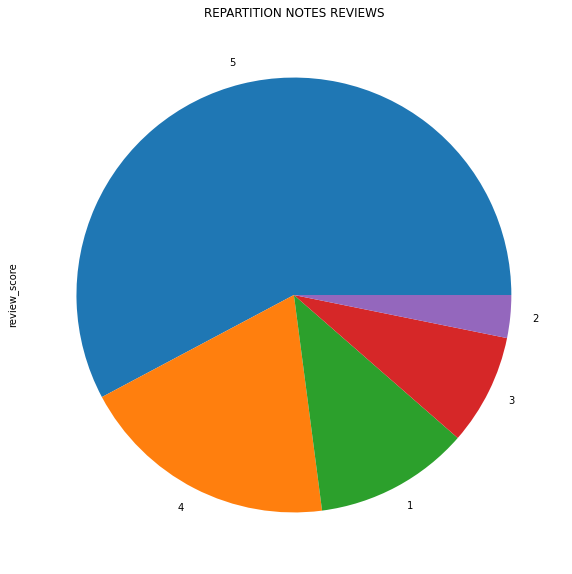

In [30]:
plt.figure(figsize=(10, 10))
df_reviews.review_score.value_counts().plot.pie()
plt.title("REPARTITION NOTES REVIEWS")
plt.show

In [31]:
df_order2 = df_order.merge(
    df_reviews[['order_id', 'review_score']], on='order_id')
df_order2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,credit_card,72.19,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,credit_card,259.83,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,credit_card,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,credit_card,25.78,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,credit_card,218.04,5
...,...,...,...,...,...,...,...,...,...,...
117324,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,boleto,343.40,5
117325,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,boleto,386.53,5
117326,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,credit_card,116.85,5
117327,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,credit_card,64.71,5


#### Commandes produits

In [32]:
df_orders = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_orders_dataset.csv")
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [33]:
dates = ['order_purchase_timestamp', 'order_approved_at',
         'order_delivered_carrier_date', 'order_delivered_customer_date',
         'order_estimated_delivery_date']

for cols in dates:
    df_orders[cols] = pd.to_datetime(df_orders[cols], format="%Y-%m-%d")

In [34]:
for cols in dates:
    df_orders[cols] = df_orders[cols].dt.date

In [35]:
df_orders['delivery_time'] = df_orders['order_delivered_customer_date'] - \
    df_orders['order_purchase_timestamp']

In [36]:
df_orders['Recency'] = max(
    df_orders['order_purchase_timestamp']) - df_orders['order_purchase_timestamp']

In [37]:
df_orders['delivery_time'] = df_orders['delivery_time'].dt.days

In [38]:
df_orders['Recency'] = df_orders['Recency'].dt.days

In [39]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8.0,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,14.0,85
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,14.0,333
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,3.0,246
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28,8.0,587
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,22.0,253
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,25.0,416
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15,17.0,282


On avait dans un premier temps défini le delivery_time par la difference entre order_approved_at et order_delivered_customer_date, mais cela donnait des valeurs négatives, qu'on ne retrouve pas en prenant order_purchase_timestamp à la place, comme confirmé ci-dessous.

In [40]:
df_orders[df_orders['delivery_time'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,Recency


In [41]:
df_orders[df_orders.delivery_time.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,Recency
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09,NaN,554
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05,2018-06-05,NaT,2018-06-28,NaN,135
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21,NaN,75
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03,NaN,409
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11,2018-01-11,NaT,2018-02-07,NaN,280
...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,NaT,NaT,NaT,2018-10-01,NaN,47
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09,NaT,NaT,2018-02-06,NaN,285
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,NaT,NaT,NaT,2018-09-27,NaN,41
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15,NaN,420


On remarque qu'un certain nombre de commande ne presentent pas de date de livraison car elles n'ont pas été validées, encore livrées ou encore ce sont des commandes annulées

In [42]:
df_orders = df_orders.dropna(subset=['delivery_time'])

In [43]:
df_orders.order_status.value_counts()

delivered    96470
canceled         6
Name: order_status, dtype: int64

In [44]:
df_orders = df_orders[df_orders['order_status'] == 'delivered']

In [45]:
df_orders_nombre = df_orders.merge(
    df_customer[['customer_id', 'customer_unique_id']], on='customer_id')

In [46]:
df_orders_nombre_group = df_orders_nombre.groupby(
    'customer_unique_id').agg('count')

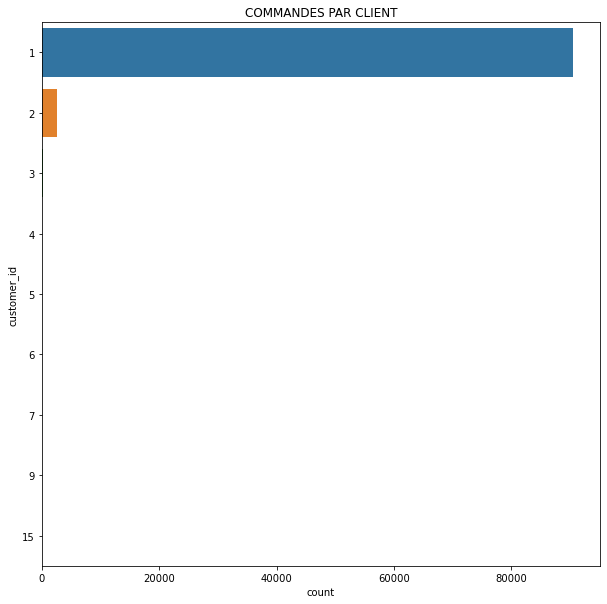

In [47]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df_orders_nombre_group,
              y=df_orders_nombre_group['customer_id'])
plt.title("COMMANDES PAR CLIENT")
plt.show()

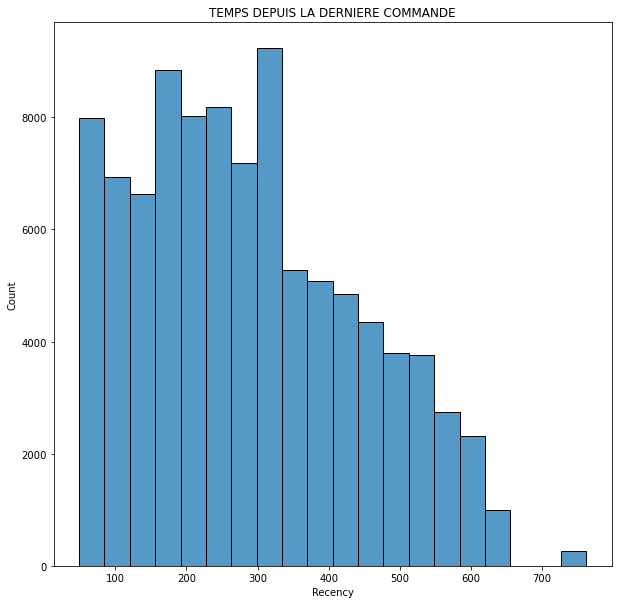

In [112]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df_orders, x=df_orders['Recency'], bins=20)
plt.title("TEMPS DEPUIS LA DERNIERE COMMANDE")
plt.show()

In [49]:
df_orders_nombre_group = df_orders_nombre_group.rename(
    columns={"customer_id": "frequence_achat"})

In [50]:
df_orders_nombre_group = df_orders_nombre_group.reset_index()

In [51]:
df_orders_nombre_group.frequence_achat.value_counts()

1     90549
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: frequence_achat, dtype: int64

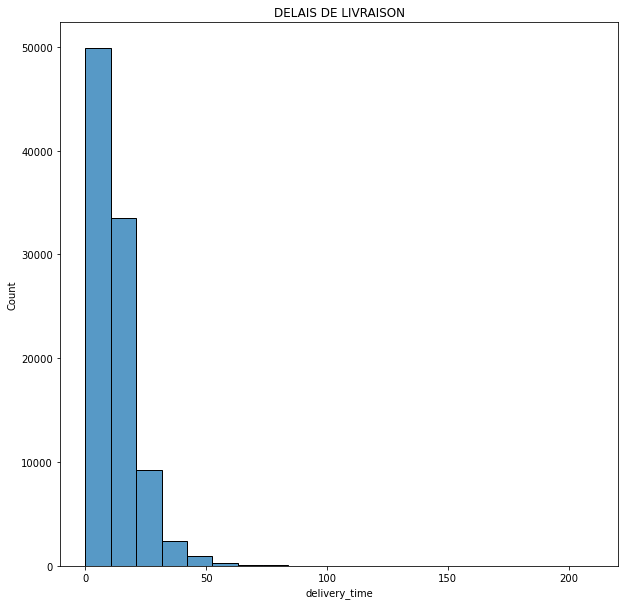

In [52]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df_orders, x=df_orders['delivery_time'], bins=20)
plt.title("DELAIS DE LIVRAISON")
plt.show()
# Retravailler les delivery_time negatif !

In [53]:
df_ca_mois = df_orders.merge(
    df_paym_order[['order_id', 'payment_value']], on='order_id')

In [54]:
df_ca_mois['order_approved_at'] = pd.to_datetime(
    df_ca_mois['order_approved_at'])

In [55]:
df_ca_count = df_ca_mois.resample('M', on='order_approved_at').sum()
df_ca_count

,delivery_time,Recency,payment_value
order_approved_at,,,
2016-10-31,5764.0,208816,46566.71
2016-11-30,0.0,0,0.00
2016-12-31,5.0,663,19.62
2017-01-31,9715.0,482962,121947.60
2017-02-28,22919.0,1060546,270809.17
2017-03-31,35641.0,1571451,410773.10
2017-04-30,35933.0,1324759,387909.63
2017-05-31,43362.0,1967232,568103.33
2017-06-30,40777.0,1630320,494527.07


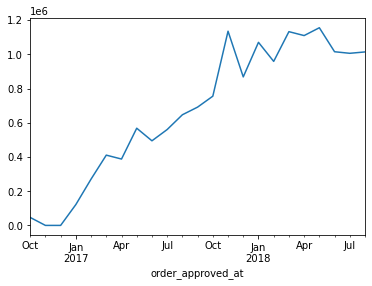

In [56]:
plt.plot(figsize=(25, 25))
df_ca_count['payment_value'].plot()
plt.show()

<AxesSubplot:xlabel='order_approved_at'>

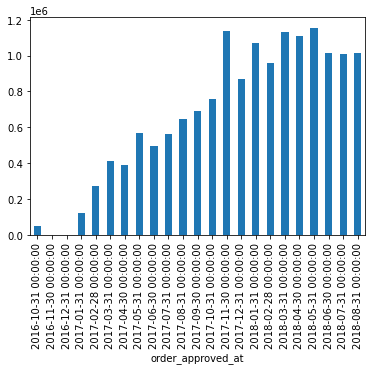

In [57]:
df_ca_count['payment_value'].plot.bar()

In [58]:
df_order3 = df_order2.merge(df_orders_nombre[[
                            'order_id', 'customer_id', 'customer_unique_id', 'order_status', 'delivery_time', 'Recency']], on='order_id')

In [59]:
df_order3 = df_order3.merge(df_orders_nombre_group[[
                            'frequence_achat', 'customer_unique_id']], on='customer_unique_id')

#### Produits

In [60]:
df_products = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_products_dataset.csv")
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [61]:
df_lien = df_order3.merge(
    df_products[['product_id', 'product_weight_g']], on='product_id')

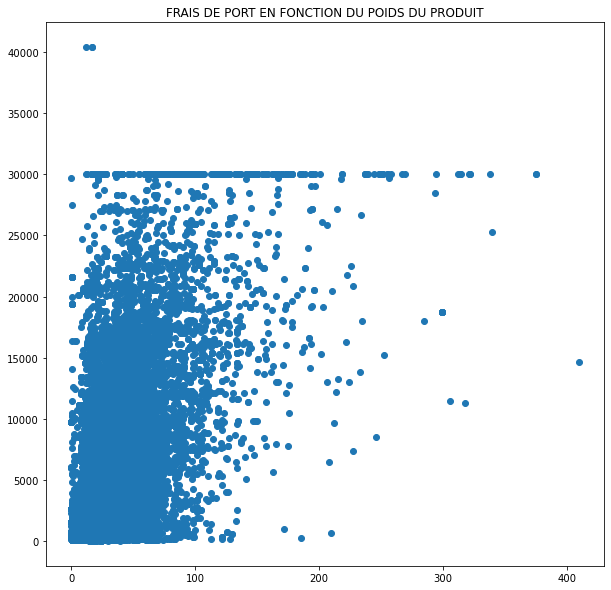

In [62]:
plt.figure(figsize=(10, 10))
plt.scatter(df_lien['freight_value'], df_lien['product_weight_g'])
plt.title("FRAIS DE PORT EN FONCTION DU POIDS DU PRODUIT")
plt.show()

In [63]:
df_order4 = df_order3.merge(
    df_products[['product_id', 'product_category_name']], on='product_id')
df_order4

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_score,customer_id,customer_unique_id,order_status,delivery_time,Recency,frequence_achat,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,credit_card,72.19,5,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,delivered,7.0,399,1,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,boleto,73.86,5,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,delivered,15.0,476,1,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,credit_card,83.23,4,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,delivered,17.0,152,1,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,credit_card,75.07,5,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,delivered,8.0,442,1,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,credit_card,72.19,5,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,delivered,14.0,433,1,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114846,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,2017-03-21 17:16:36,146.9,15.20,boleto,162.10,1,e85ff8cc3cc2c09bdb9204dd7930c0fb,ffe3e199b9d0b7fb7d2d29a5b9498447,delivered,21.0,581,1,casa_construcao
114847,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,credit_card,181.10,5,050309b91cc5e04e68841938e7984aaf,a1c2e4b4c1b29e41684ebdf3cc6538f8,delivered,10.0,96,1,ferramentas_jardim
114848,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,credit_card,756.91,5,dec8952e97ef6124259c56914fb3569c,c86ab5ff2bac777c4e770a383feca4eb,delivered,7.0,503,1,relogios_presentes
114849,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,credit_card,273.92,4,a5201e1a6d71a8d21e869151bd5b4085,2a3ab9bf9639491997586882c502540a,delivered,21.0,303,1,esporte_lazer


#### Distributeurs

In [64]:
df_sellers = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\olist_sellers_dataset.csv")
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [65]:
df_sellers.drop_duplicates(subset="seller_id", inplace=True)

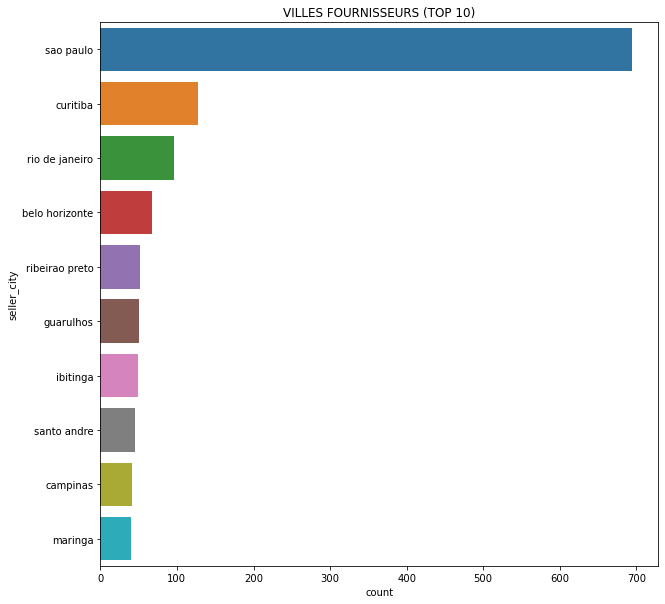

In [66]:
plt.figure(figsize=(10, 10))
sns.countplot(y="seller_city", data=df_sellers,
              order=df_sellers["seller_city"].value_counts().index[:10])
plt.title("VILLES FOURNISSEURS (TOP 10)")
plt.show()

In [67]:
df_sellers = df_sellers.rename(
    columns={"seller_zip_code_prefix": "geolocation_zip_code_prefix"})

In [68]:
df_sellers2 = df_sellers.merge(
    df_geoloc[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], on='geolocation_zip_code_prefix')
df_sellers2.drop_duplicates(subset=['seller_id'], keep='last')

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
79,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.899471,-47.064267
159,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.899471,-47.064267
262,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.374632,-46.941224
649,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.907863,-43.175693
1036,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,-22.907863,-43.175693
...,...,...,...,...,...,...
434784,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP,-23.528454,-46.739722
434852,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.452487,-51.867759
434920,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.660173,-46.678758
435016,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.748636,-52.310751


In [69]:
df_sellers2 = df_sellers2.rename(
    columns={"geolocation_lat": "seller_lat", "geolocation_lng": "seller_lng"})

In [70]:
df_customer = df_customer.rename(
    columns={"customer_zip_code_prefix": "geolocation_zip_code_prefix"})

In [71]:
df_customer2 = df_customer.merge(
    df_geoloc[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], on='geolocation_zip_code_prefix')
df_customer2.drop_duplicates(subset=['customer_unique_id'], keep='last')

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
146,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,1.0,SP,-20.500253,-47.400367
293,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,1.0,SP,-20.500253,-47.400367
440,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,1.0,SP,-20.500253,-47.400367
587,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,1.0,SP,-20.500253,-47.400367
734,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,1.0,SP,-20.500253,-47.400367
...,...,...,...,...,...,...,...
15083426,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,0.0,PR,-23.501620,-52.151097
15083432,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,0.0,RS,-28.528114,-54.147973
15083439,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,5.0,SP,-23.587510,-46.738970
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,3.0,GO,-16.822945,-49.244615


In [72]:
df_customer2 = df_customer2.rename(
    columns={"geolocation_lat": "cust_lat", "geolocation_lng": "cust_lng"})

In [73]:
df_distance = df_order4.merge(
    df_sellers2[['seller_id', 'seller_lat', 'seller_lng']], on='seller_id')

In [74]:
df_distance = df_distance.drop_duplicates(
    subset=['customer_unique_id'], keep='first')

In [75]:
df_distance = df_distance.merge(
    df_customer2[['customer_unique_id', 'cust_lat', 'cust_lng']], on='customer_unique_id')

In [76]:
df_distance = df_distance.drop_duplicates(
    subset=['customer_unique_id'], keep='first')
df_distance

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_score,...,customer_unique_id,order_status,delivery_time,Recency,frequence_achat,product_category_name,seller_lat,seller_lng,cust_lat,cust_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,credit_card,72.19,5,...,871766c5855e863f6eccc05f988b23cb,delivered,7.0,399,1,cool_stuff,-22.498183,-44.123614,-21.758076,-41.312633
149,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,boleto,73.86,5,...,0fb8e3eab2d3e79d92bb3fffbb97f188,delivered,15.0,476,1,cool_stuff,-22.498183,-44.123614,-17.885607,-51.719640
293,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,credit_card,83.23,4,...,3419052c8c6b45daf79c1e426f9e9bcb,delivered,17.0,152,1,cool_stuff,-22.498183,-44.123614,-19.918025,-43.976133
675,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,credit_card,75.07,5,...,e7c828d22c0682c1565252deefbe334d,delivered,8.0,442,1,cool_stuff,-22.498183,-44.123614,-25.516321,-49.122818
708,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,credit_card,72.19,5,...,0bb98ba72dcc08e95f9d8cc434e9a2cc,delivered,14.0,433,1,cool_stuff,-22.498183,-44.123614,-20.653542,-43.790837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14565210,fcb25cc2887d15b5373673a0630ad13a,1,47ac3d02c68a76bc97b3b305f6e1192f,749e7cdabbaf72f16677859e27874ba5,2017-09-08 17:30:19,41.90,19.84,credit_card,61.74,1,...,3d7180d54d1d270196e1b6a82c50ef46,delivered,11.0,409,1,NaN,-23.447026,-46.519971,-22.972957,-43.397063
14565716,fd0342fda6ba083712b6ed0d4e6ac483,1,7683fe3e73bd7af6d0f6a6ed497cb04a,a1bea9970d8f65b240555f99c2214f7f,2018-07-27 17:20:37,75.00,27.48,credit_card,102.48,3,...,4f0a93edbe276308a671448764c8e1c2,delivered,9.0,86,1,construcao_ferramentas_iluminacao,-25.440714,-49.188444,-19.042341,-57.643125
14565766,fd607d0a02cb276bc764a15f80f0423f,1,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,2018-08-02 02:24:15,171.39,19.35,boleto,381.48,5,...,c13401002a5f9b60befb4c720de50be0,delivered,21.0,83,1,moveis_decoracao,-23.626053,-46.554888,-12.981587,-38.455265
14566122,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,boleto,225.21,4,...,52a953541861bbb4b79b39df24e00243,delivered,6.0,432,1,eletronicos,-25.379062,-49.227004,-22.546108,-47.383618


In [77]:
df_distance['cust_coord'] = list(
    zip(df_distance.cust_lat, df_distance.cust_lng))

In [78]:
df_distance['seller_coord'] = list(
    zip(df_distance.seller_lat, df_distance.seller_lng))

In [79]:
zipper = zip(df_distance['cust_coord'], df_distance['seller_coord'])
df_distance['dist_cust_seller'] = [haversine(i, j) for i, j in zipper]

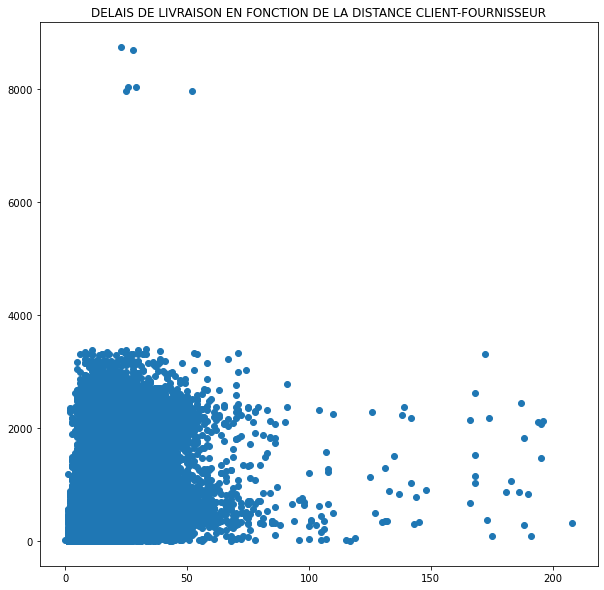

In [80]:
plt.figure(figsize=(10, 10))
plt.scatter(df_distance['delivery_time'], df_distance['dist_cust_seller'])
plt.title("DELAIS DE LIVRAISON EN FONCTION DE LA DISTANCE CLIENT-FOURNISSEUR")
plt.show()

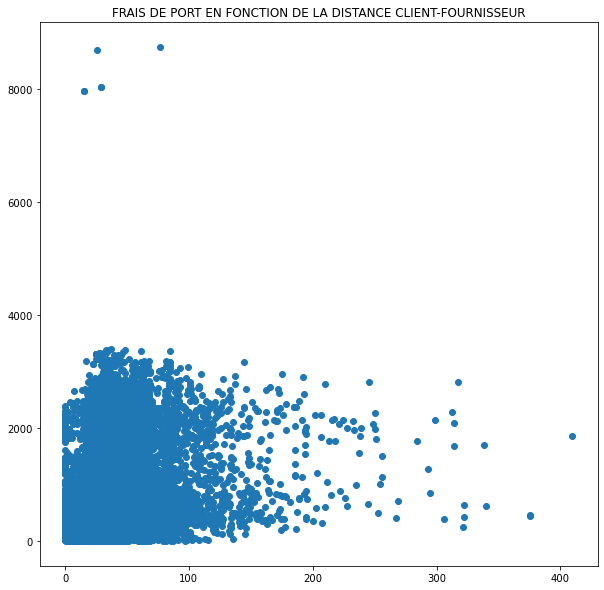

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(df_distance['freight_value'], df_distance['dist_cust_seller'])
plt.title("FRAIS DE PORT EN FONCTION DE LA DISTANCE CLIENT-FOURNISSEUR")
plt.show()

In [82]:
df_distance = df_distance.drop(['seller_lat',
                                'seller_lng',
                                'cust_lat',
                                'cust_lng',
                                'cust_coord',
                                'seller_coord'], axis=1)

### Regroupement final et cleaning colonnes

In [83]:
df_all = df_distance

#### Traduction catégories

In [84]:
df_trad = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P5\product_category_name_translation.csv")
df_trad

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [85]:
df_all_trad = df_all.merge(
    df_trad[['product_category_name', 'product_category_name_english']], on='product_category_name')
df_all_trad

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_score,customer_id,customer_unique_id,order_status,delivery_time,Recency,frequence_achat,product_category_name,dist_cust_seller,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,credit_card,72.19,5,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,delivered,7.0,399,1,cool_stuff,301.006080,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,boleto,73.86,5,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,delivered,15.0,476,1,cool_stuff,943.873300,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,credit_card,83.23,4,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,delivered,17.0,152,1,cool_stuff,287.307755,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,credit_card,75.07,5,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,delivered,8.0,442,1,cool_stuff,608.577657,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,credit_card,72.19,5,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,delivered,14.0,433,1,cool_stuff,207.980995,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90972,31a2886d02ad2127bfec204da2e93b66,1,3a96bcbf644a5d390107570628568026,70126eecc6aa1274392a1743866e9678,2018-07-31 10:35:17,19.80,7.40,credit_card,27.20,5,28738edfba72391be47d697e6e7e5770,e839774c9d31569dba47946296e58b33,delivered,2.0,84,1,artes_e_artesanato,74.994369,arts_and_craftmanship
90973,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,credit_card,77.50,5,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,delivered,6.0,81,1,artes_e_artesanato,623.993701,arts_and_craftmanship
90974,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,credit_card,84.63,3,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,delivered,4.0,86,1,artes_e_artesanato,254.171222,arts_and_craftmanship
90975,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,boleto,24.69,5,c61336d6c835632048f973d2f2db598d,428f4721a509be8c52de6ec2900ba918,delivered,5.0,55,1,artes_e_artesanato,289.354874,arts_and_craftmanship


In [86]:
df_all_trad_mean = df_orders_nombre_group = df_all_trad.groupby(
    'customer_unique_id').agg('mean')
df_all_trad_mean = df_all_trad_mean.reset_index()

In [87]:
df_all_trad = df_all_trad.drop_duplicates(
    subset=['customer_unique_id'], keep='last')
df_all_trad = df_all_trad.drop(
    ['payment_value', 'review_score', 'delivery_time'], axis=1)

In [88]:
df_all_clean = df_all_trad.merge(df_all_trad_mean[[
                                 'customer_unique_id', 'payment_value', 'review_score', 'delivery_time']], on='customer_unique_id')
df_all_clean

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,customer_id,customer_unique_id,order_status,Recency,frequence_achat,product_category_name,dist_cust_seller,product_category_name_english,payment_value,review_score,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,credit_card,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,delivered,399,1,cool_stuff,301.006080,cool_stuff,72.19,5,7.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,boleto,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,delivered,476,1,cool_stuff,943.873300,cool_stuff,73.86,5,15.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,credit_card,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,delivered,152,1,cool_stuff,287.307755,cool_stuff,83.23,4,17.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,credit_card,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,delivered,442,1,cool_stuff,608.577657,cool_stuff,75.07,5,8.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,credit_card,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,delivered,433,1,cool_stuff,207.980995,cool_stuff,72.19,5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90972,31a2886d02ad2127bfec204da2e93b66,1,3a96bcbf644a5d390107570628568026,70126eecc6aa1274392a1743866e9678,2018-07-31 10:35:17,19.80,7.40,credit_card,28738edfba72391be47d697e6e7e5770,e839774c9d31569dba47946296e58b33,delivered,84,1,artes_e_artesanato,74.994369,arts_and_craftmanship,27.20,5,2.0
90973,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,credit_card,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,delivered,81,1,artes_e_artesanato,623.993701,arts_and_craftmanship,77.50,5,6.0
90974,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,credit_card,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,delivered,86,1,artes_e_artesanato,254.171222,arts_and_craftmanship,84.63,3,4.0
90975,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,boleto,c61336d6c835632048f973d2f2db598d,428f4721a509be8c52de6ec2900ba918,delivered,55,1,artes_e_artesanato,289.354874,arts_and_craftmanship,24.69,5,5.0


In [89]:
index_ = ['order_id', 'order_item_id', 'seller_id', 'shipping_limit_date',
          'price', 'freight_value', 'customer_id', 'order_status', 'product_category_name']
for col in index_:
    df_all_clean = df_all_clean.drop([col], axis=1)

<AxesSubplot:>

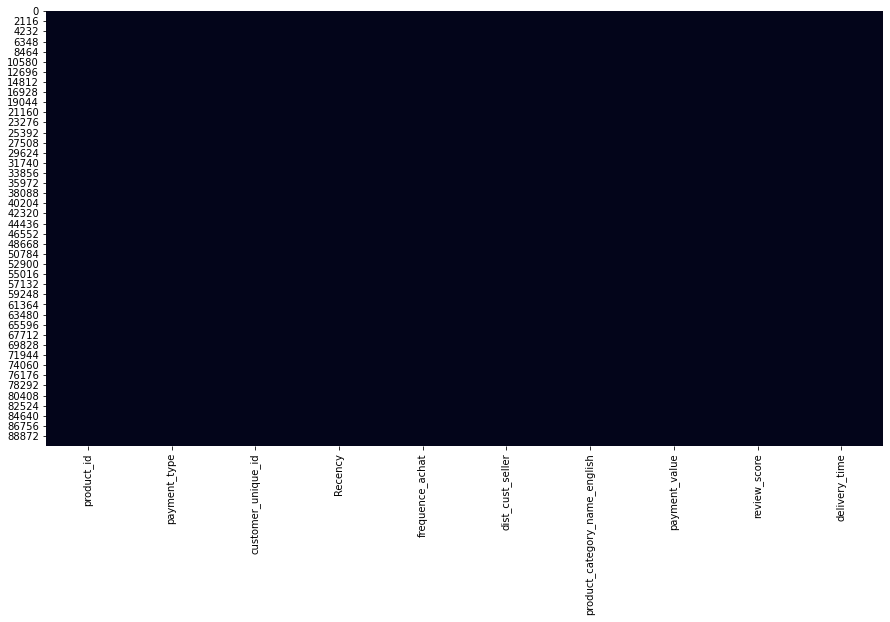

In [90]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_all_clean.isna(), cbar=False)

In [91]:
df_all_clean[df_all_clean.delivery_time.isna()]

,product_id,payment_type,customer_unique_id,Recency,frequence_achat,dist_cust_seller,product_category_name_english,payment_value,review_score,delivery_time


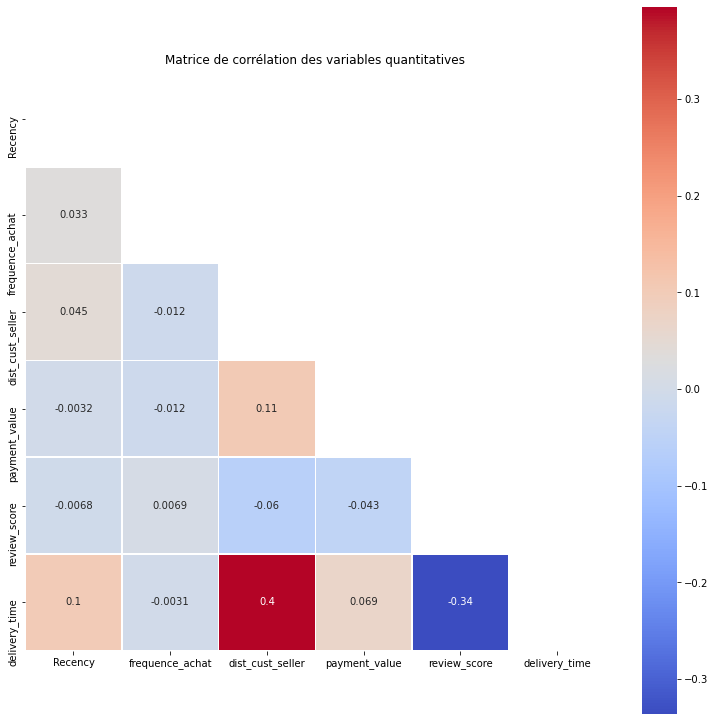

In [92]:
corr_matrix = df_all_clean.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask,
            linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

In [93]:
pg.anova(data=df_all_clean, dv="delivery_time",
         between="dist_cust_seller", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,dist_cust_seller,7.965243e+06,86434,92.154050,1.694505,3.832335e-114,0.969921
1,Within,2.470124e+05,4542,54.384063,NaN,NaN,NaN


<AxesSubplot:ylabel='product_category_name_english'>

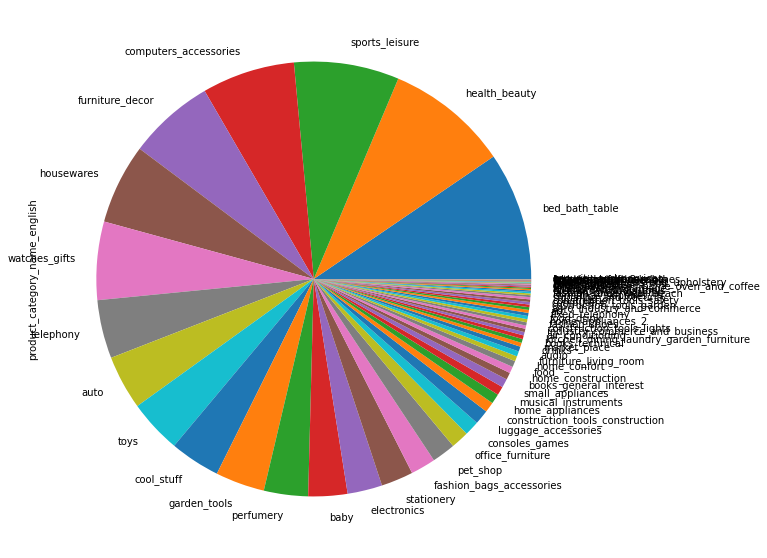

In [94]:
plt.figure(figsize=(10, 10))
df_all_clean.product_category_name_english.value_counts().plot.pie()

In [95]:
df_all_clean.product_category_name_english.unique()

array(['cool_stuff', 'toys', 'pet_shop', 'computers_accessories',
       'health_beauty', 'telephony', 'auto', 'musical_instruments',
       'tablets_printing_image', 'furniture_decor', 'consoles_games',
       'garden_tools', 'bed_bath_table', 'perfumery', 'housewares',
       'stationery', 'sports_leisure', 'audio',
       'costruction_tools_garden', 'baby', 'books_technical',
       'dvds_blu_ray', 'food', 'fashion_bags_accessories', 'home_confort',
       'home_comfort_2', 'signaling_and_security', 'cine_photo',
       'construction_tools_construction', 'electronics',
       'fixed_telephony', 'diapers_and_hygiene', 'fashion_male_clothing',
       'office_furniture', 'furniture_living_room', 'watches_gifts',
       'construction_tools_safety', 'luggage_accessories', 'market_place',
       'costruction_tools_tools', 'home_appliances', 'home_construction',
       'agro_industry_and_commerce', 'air_conditioning',
       'small_appliances', 'small_appliances_home_oven_and_coffee',
    

In [96]:
# Création de groupes
crea_groupes = {"cool_stuff": "other",
                "toys": "games",
                "pet_shop": "other",
                "computers_accessories": "tech",
                "health_beauty": "healthcare",
                "telephony": "tech",
                "auto": "business",
                "musical_instruments": "media",
                "tablets_printing_image": "tech",
                "furniture_decor": "furniture",
                "consoles_games": "games",
                "garden_tools": "home_construction",
                "bed_bath_table": "home_interior",
                "perfumery": "healthcare",
                "housewares": "furniture",
                "stationery": "furniture",
                "sports_leisure": "sport",
                "audio": "media",
                "baby": "healthcare",
                "costruction_tools_garden": "home_construction",
                "books_technical": "media",
                "dvds_blu_ray": "media",
                "food": "food",
                "fashion_bags_accessories": "clothing_accessories",
                "home_confort": "home_interior",
                "home_comfort_2": "home_interior",
                "signaling_and_security": "other",
                "cine_photo": "media",
                "construction_tools_construction": "home_construction",
                "electronics": "tech",
                "fixed_telephony": "tech",
                "diapers_and_hygiene": "healthcare",
                "fashion_male_clothing": "clothing_accessories",
                "office_furniture": "business",
                "furniture_living_room": "furniture",
                "watches_gifts": "clothing_accessories",
                "construction_tools_safety": "home_construction",
                "luggage_accessories": "clothing_accessories",
                "market_place": "business",
                "costruction_tools_tools": "home_construction",
                "home_appliances": "home_interior",
                "home_construction": "home_construction",
                "agro_industry_and_commerce": "business",
                "air_conditioning": "home_interior",
                "small_appliances": "furniture",
                "small_appliances_home_oven_and_coffee": "furniture",
                "kitchen_dining_laundry_garden_furniture": "furniture",
                "industry_commerce_and_business": "business",
                "fashion_shoes": "clothing_accessories",
                "home_appliances_2": "furniture",
                "books_general_interest": "media",
                "construction_tools_lights": "home_construction",
                "art": "media",
                "music": "media",
                "drinks": "food",
                "party_supplies": "furniture",
                "christmas_supplies": "furniture",
                "fashion_sport": "clothing_accessories",
                "furniture_mattress_and_upholstery": "home_interior",
                "food_drink": "food",
                "cds_dvds_musicals": "media",
                "security_and_services": "other",
                "fashion_childrens_clothes": "clothing_accessories",
                "fashio_female_clothing": "clothing_accessories",
                "computers": "tech",
                "furniture_bedroom": "home_interior",
                "fashion_underwear_beach": "clothing_accessories",
                "books_imported": "media",
                "la_cuisine": "home_interior",
                "flowers": "furniture",
                "arts_and_craftmanship": "business"}

for key, value in crea_groupes.items():
    df_all_clean['product_category_name_english'].loc[df_all_clean['product_category_name_english'].str.contains(
        key, case=False, regex=False)] = value

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:ylabel='product_category_name_english'>

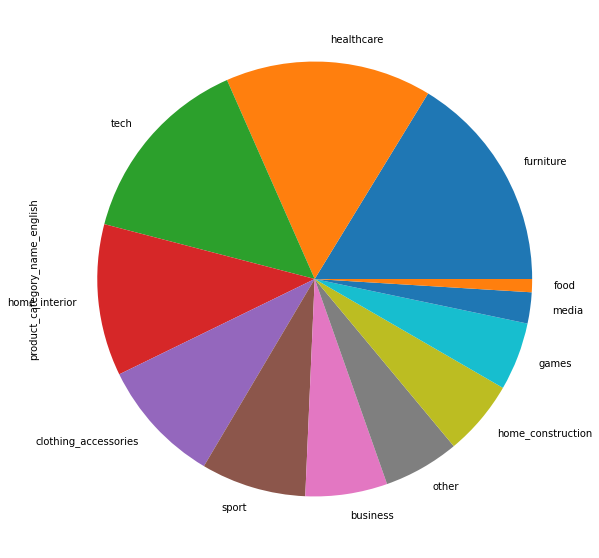

In [97]:
plt.figure(figsize=(10, 10))
df_all_clean.product_category_name_english.value_counts().plot.pie()

<AxesSubplot:ylabel='payment_type'>

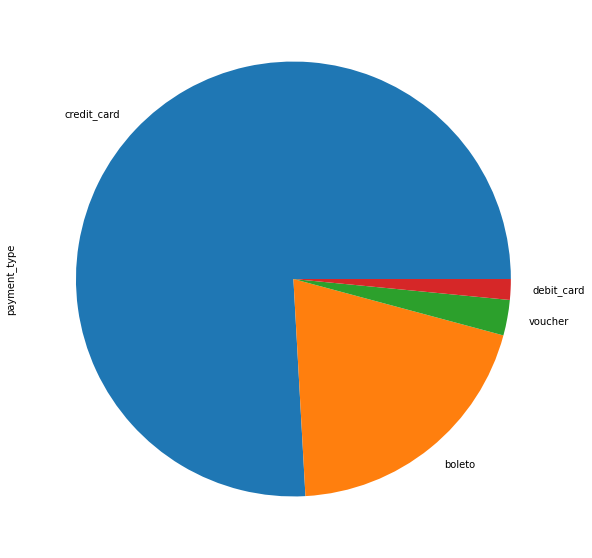

In [98]:
plt.figure(figsize=(10, 10))
df_all_clean.payment_type.value_counts().plot.pie()

In [99]:
df_paym_mean = df_all_clean.groupby('payment_type').agg('mean')

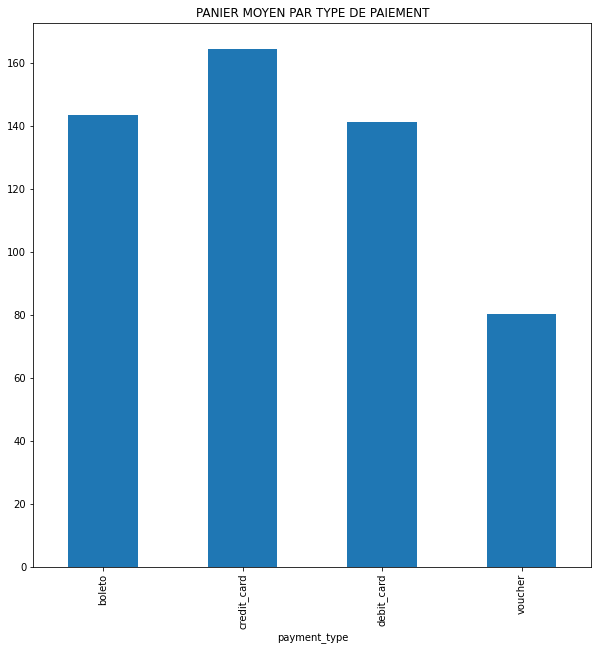

In [100]:
plt.figure(figsize=(10, 10))
df_paym_mean['payment_value'].plot.bar()
plt.title('PANIER MOYEN PAR TYPE DE PAIEMENT')
plt.show()

In [101]:
# Création de groupes
crea_groupes2 = {'credit_card': '1',
                 'debit_card': '1',
                 'voucher': '0',
                 'boleto': '0'}

for key, value in crea_groupes2.items():
    df_all_clean['payment_type'].loc[df_all_clean['payment_type'].str.contains(
        key, case=False, regex=False)] = value

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [102]:
df_categ_mean = df_all_clean.groupby(
    'product_category_name_english').agg('mean')

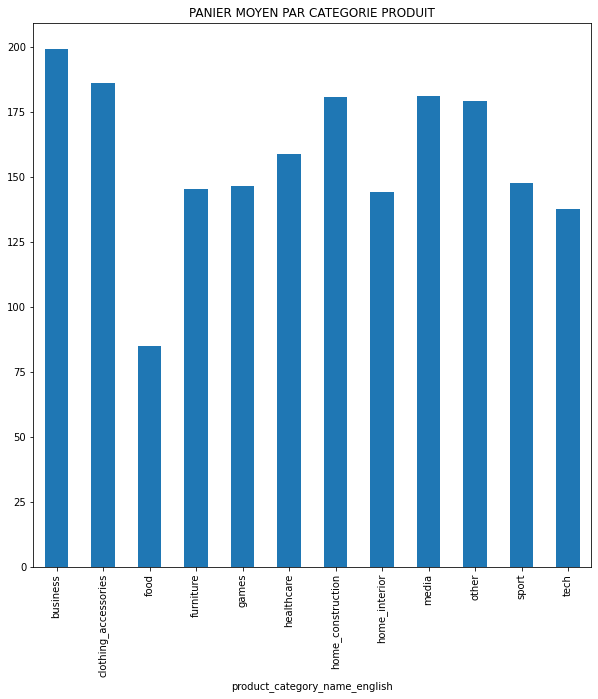

In [103]:
plt.figure(figsize=(10, 10))
df_categ_mean['payment_value'].plot.bar()
plt.title('PANIER MOYEN PAR CATEGORIE PRODUIT')
plt.show()

In [104]:
df_score_mean = df_all_clean.groupby('review_score').agg('mean')

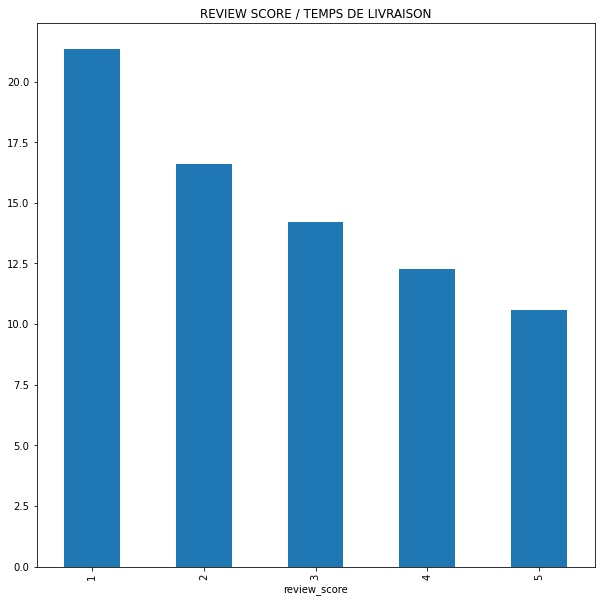

In [105]:
plt.figure(figsize=(10, 10))
df_score_mean['delivery_time'].plot.bar()
plt.title('REVIEW SCORE / TEMPS DE LIVRAISON')
plt.show()

In [113]:
pg.anova(data=df_all_clean, dv='delivery_time',
         between='review_score', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,review_score,9.590743e+05,4,239768.567403,3007.263319,0.0,0.116786
1,Within,7.253181e+06,90972,79.729821,NaN,NaN,NaN


In [106]:
df_all_clean
# On pourrait avoir le poids livraison / frais livraison / paiement en plusieurs fois

,product_id,payment_type,customer_unique_id,Recency,frequence_achat,dist_cust_seller,product_category_name_english,payment_value,review_score,delivery_time
0,4244733e06e7ecb4970a6e2683c13e61,1,871766c5855e863f6eccc05f988b23cb,399,1,301.006080,other,72.19,5,7.0
1,4244733e06e7ecb4970a6e2683c13e61,0,0fb8e3eab2d3e79d92bb3fffbb97f188,476,1,943.873300,other,73.86,5,15.0
2,4244733e06e7ecb4970a6e2683c13e61,1,3419052c8c6b45daf79c1e426f9e9bcb,152,1,287.307755,other,83.23,4,17.0
3,4244733e06e7ecb4970a6e2683c13e61,1,e7c828d22c0682c1565252deefbe334d,442,1,608.577657,other,75.07,5,8.0
4,4244733e06e7ecb4970a6e2683c13e61,1,0bb98ba72dcc08e95f9d8cc434e9a2cc,433,1,207.980995,other,72.19,5,14.0
...,...,...,...,...,...,...,...,...,...,...
90972,3a96bcbf644a5d390107570628568026,1,e839774c9d31569dba47946296e58b33,84,1,74.994369,media,27.20,5,2.0
90973,2b54fb9a4acf707537eb53eb2458c241,1,8c3c961a52bb5a0ffbce1d4e6d25cd67,81,1,623.993701,media,77.50,5,6.0
90974,9c313adb4b38a55b092f53f83f78be9e,1,8d80e477643ec569b24592ce3d9dfc4c,86,1,254.171222,media,84.63,3,4.0
90975,5aa0d6ed4e6c0995d62090cd82cde89a,0,428f4721a509be8c52de6ec2900ba918,55,1,289.354874,media,24.69,5,5.0


In [107]:
df_all_clean.describe()

,Recency,frequence_achat,dist_cust_seller,payment_value,review_score,delivery_time
count,90977.000000,90977.000000,90977.000000,90977.000000,90977.000000,90977.000000
mean,287.029040,1.033679,602.403410,157.565881,4.154984,12.457456
std,152.811388,0.210334,596.283086,216.278926,1.284405,9.500967
min,49.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,163.000000,1.000000,186.751614,60.010000,4.000000,7.000000
50%,268.000000,1.000000,434.891704,103.040000,5.000000,10.000000
75%,396.000000,1.000000,800.537336,175.020000,5.000000,16.000000
max,744.000000,15.000000,8736.959686,13664.080000,5.000000,208.000000


In [108]:
df_all_clean['m_quartile'] = pd.qcut(
    df_all_clean['payment_value'], 4, ['4', '3', '2', '1'])

In [109]:
df_clean = df_all_clean.merge(
    df_customer[['customer_unique_id', 'customer_city']], on='customer_unique_id')
df_clean

,product_id,payment_type,customer_unique_id,Recency,frequence_achat,dist_cust_seller,product_category_name_english,payment_value,review_score,delivery_time,m_quartile,customer_city
0,4244733e06e7ecb4970a6e2683c13e61,1,871766c5855e863f6eccc05f988b23cb,399,1,301.006080,other,72.19,5,7.0,3,1.0
1,4244733e06e7ecb4970a6e2683c13e61,0,0fb8e3eab2d3e79d92bb3fffbb97f188,476,1,943.873300,other,73.86,5,15.0,3,0.0
2,4244733e06e7ecb4970a6e2683c13e61,1,3419052c8c6b45daf79c1e426f9e9bcb,152,1,287.307755,other,83.23,4,17.0,3,4.0
3,4244733e06e7ecb4970a6e2683c13e61,1,e7c828d22c0682c1565252deefbe334d,442,1,608.577657,other,75.07,5,8.0,3,0.0
4,4244733e06e7ecb4970a6e2683c13e61,1,0bb98ba72dcc08e95f9d8cc434e9a2cc,433,1,207.980995,other,72.19,5,14.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94238,3a96bcbf644a5d390107570628568026,1,e839774c9d31569dba47946296e58b33,84,1,74.994369,media,27.20,5,2.0,4,1.0
94239,2b54fb9a4acf707537eb53eb2458c241,1,8c3c961a52bb5a0ffbce1d4e6d25cd67,81,1,623.993701,media,77.50,5,6.0,3,0.0
94240,9c313adb4b38a55b092f53f83f78be9e,1,8d80e477643ec569b24592ce3d9dfc4c,86,1,254.171222,media,84.63,3,4.0,3,1.0
94241,5aa0d6ed4e6c0995d62090cd82cde89a,0,428f4721a509be8c52de6ec2900ba918,55,1,289.354874,media,24.69,5,5.0,4,0.0


In [110]:
df_clean.to_csv(
    r'C:\Users\Damien\Desktop\Data Scientist\P5\Dataset\olist_clean.csv', index=False)